# Reinforcement Learning-Monte Carlo-Exploring with start state-Greedt approach

https://medium.com/@zsalloum/monte-carlo-in-reinforcement-learning-the-easy-way-564c53010511


In [ ]:
#Importing required Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Start=S
#Goal=G(End)
#W=Wall(Cannot pass)
#X=way(You can pass)
#Grid = np.zeros(shape=(6,6))
Grid=np.array([['X','X','W','X','X','X'],
     ['X','S','X','X','X','X'],
     ['X','X','X','W','X','X'],
     ['X','W','X','X','X','X'],
     ['X','X','X','X','W','X'],
     ['X','X','X','X','G','X']])

In [5]:
Grid.shape

(6, 6)

In [6]:
#Get the dimensions of the map and Start postion in this case start positon is predefined as per the algorithm
width = Grid.shape[0]
height = Grid.shape[1]
print("Width & Height  :",width,height)
for i  in range(width):
    for j in range(height):
        if Grid[i][j]=='S':
            start=(i,j)
print("Start Postion  :",start)

Width & Height  : 6 6
Start Postion  : (1, 1)


In [7]:
# rewards should be a dict of: (row, col): reward
# actions should be a dict of: (row, col): list of possible actions to move agent
rewards={}
actions={}
#Set rewards
for i  in range(width):
    for j in range(height):
        if Grid[i][j]=='W':
            rewards[(i,j)]=-1
        else:
            rewards[(i,j)]=1
for k,v in rewards.items():
    print(k,v)
#set actions at each state
for i  in range(width):
    for j in range(height):
        if i==0:
            if j==0:
                actions[(i,j)]=['R','D']
            elif j== width-1:
                actions[(i,j)]=['D','L']
            else:
                actions[(i,j)]=['R','D','L']
        if i>0 and i<height-1:
            if j==0:
                actions[(i,j)]=['U','R','D']
            elif j==width-1:
                actions[(i,j)]=['U','D','L']
            else:
                actions[(i,j)]=['U','R','D','L']
        if i== height-1:
            if j==0:
                actions[(i,j)]=['U','R']
            elif j== width-1:
                actions[(i,j)]=['U','L']
            else:
                actions[(i,j)]=['U','R','L']
for k,v in actions.items():
    print(k,v)

(0, 0) 1
(0, 1) 1
(0, 2) -1
(0, 3) 1
(0, 4) 1
(0, 5) 1
(1, 0) 1
(1, 1) 1
(1, 2) 1
(1, 3) 1
(1, 4) 1
(1, 5) 1
(2, 0) 1
(2, 1) 1
(2, 2) 1
(2, 3) -1
(2, 4) 1
(2, 5) 1
(3, 0) 1
(3, 1) -1
(3, 2) 1
(3, 3) 1
(3, 4) 1
(3, 5) 1
(4, 0) 1
(4, 1) 1
(4, 2) 1
(4, 3) 1
(4, 4) -1
(4, 5) 1
(5, 0) 1
(5, 1) 1
(5, 2) 1
(5, 3) 1
(5, 4) 1
(5, 5) 1
(0, 0) ['R', 'D']
(0, 1) ['R', 'D', 'L']
(0, 2) ['R', 'D', 'L']
(0, 3) ['R', 'D', 'L']
(0, 4) ['R', 'D', 'L']
(0, 5) ['D', 'L']
(1, 0) ['U', 'R', 'D']
(1, 1) ['U', 'R', 'D', 'L']
(1, 2) ['U', 'R', 'D', 'L']
(1, 3) ['U', 'R', 'D', 'L']
(1, 4) ['U', 'R', 'D', 'L']
(1, 5) ['U', 'D', 'L']
(2, 0) ['U', 'R', 'D']
(2, 1) ['U', 'R', 'D', 'L']
(2, 2) ['U', 'R', 'D', 'L']
(2, 3) ['U', 'R', 'D', 'L']
(2, 4) ['U', 'R', 'D', 'L']
(2, 5) ['U', 'D', 'L']
(3, 0) ['U', 'R', 'D']
(3, 1) ['U', 'R', 'D', 'L']
(3, 2) ['U', 'R', 'D', 'L']
(3, 3) ['U', 'R', 'D', 'L']
(3, 4) ['U', 'R', 'D', 'L']
(3, 5) ['U', 'D', 'L']
(4, 0) ['U', 'R', 'D']
(4, 1) ['U', 'R', 'D', 'L']
(4, 2) ['U', 'R', '

In [8]:
SMALL_ENOUGH = 1e-3
GAMMA = 0.9
ALL_POSSIBLE_ACTIONS = ['U', 'D', 'L', 'R']

In [9]:
# state -> action
# initialize a random policy
policy = {}
for state in actions.keys():
    policy[state] = np.random.choice(ALL_POSSIBLE_ACTIONS)
# initial policy

def print_policy(P, g):
  for i in range(width):
    print("------------------------------------")
    for j in range(height):
        a = P[(i,j)]
        print("  %s  |" % a, end="")
    print("")
print("initial policy:")
print_policy(policy, Grid)

initial policy:
------------------------------------
  U  |  R  |  L  |  R  |  U  |  L  |
------------------------------------
  U  |  D  |  D  |  L  |  D  |  R  |
------------------------------------
  U  |  D  |  D  |  L  |  U  |  D  |
------------------------------------
  R  |  R  |  D  |  D  |  U  |  U  |
------------------------------------
  L  |  U  |  L  |  U  |  R  |  L  |
------------------------------------
  R  |  R  |  L  |  R  |  D  |  R  |


In [19]:
# initial Q values for all states in grid
# initialize Q(s,a) and returns
Q = {}
returns = {} # dictionary of state -> list of returns we've received
states = actions.keys()
for s in states:
  if s in actions.keys(): # not a terminal state
    Q[s] = {}
    for a in ALL_POSSIBLE_ACTIONS:
      Q[s][a] = 0
      returns[(s,a)] = []
  else:
    # terminal state or state we can't otherwise get to
    pass
  
# initial Q values for all states in grid
print(Q)

{(0, 0): {'U': 0, 'D': 0, 'L': 0, 'R': 0}, (0, 1): {'U': 0, 'D': 0, 'L': 0, 'R': 0}, (0, 2): {'U': 0, 'D': 0, 'L': 0, 'R': 0}, (0, 3): {'U': 0, 'D': 0, 'L': 0, 'R': 0}, (0, 4): {'U': 0, 'D': 0, 'L': 0, 'R': 0}, (0, 5): {'U': 0, 'D': 0, 'L': 0, 'R': 0}, (1, 0): {'U': 0, 'D': 0, 'L': 0, 'R': 0}, (1, 1): {'U': 0, 'D': 0, 'L': 0, 'R': 0}, (1, 2): {'U': 0, 'D': 0, 'L': 0, 'R': 0}, (1, 3): {'U': 0, 'D': 0, 'L': 0, 'R': 0}, (1, 4): {'U': 0, 'D': 0, 'L': 0, 'R': 0}, (1, 5): {'U': 0, 'D': 0, 'L': 0, 'R': 0}, (2, 0): {'U': 0, 'D': 0, 'L': 0, 'R': 0}, (2, 1): {'U': 0, 'D': 0, 'L': 0, 'R': 0}, (2, 2): {'U': 0, 'D': 0, 'L': 0, 'R': 0}, (2, 3): {'U': 0, 'D': 0, 'L': 0, 'R': 0}, (2, 4): {'U': 0, 'D': 0, 'L': 0, 'R': 0}, (2, 5): {'U': 0, 'D': 0, 'L': 0, 'R': 0}, (3, 0): {'U': 0, 'D': 0, 'L': 0, 'R': 0}, (3, 1): {'U': 0, 'D': 0, 'L': 0, 'R': 0}, (3, 2): {'U': 0, 'D': 0, 'L': 0, 'R': 0}, (3, 3): {'U': 0, 'D': 0, 'L': 0, 'R': 0}, (3, 4): {'U': 0, 'D': 0, 'L': 0, 'R': 0}, (3, 5): {'U': 0, 'D': 0, 'L': 0, 

In [20]:
def random_action(s, eps=0.1):
    # with probability 1 - eps 
    a=policy[s]
    p = np.random.random()
    if p < (1 - eps):
        return a
    else:
        return np.random.choice(ALL_POSSIBLE_ACTIONS)

In [21]:
def max_dict(d):
  # returns the argmax (key) and max (value) from a dictionary
  max_key = None
  max_val = float('-inf')
  for k, v in d.items():
    if v > max_val:
      max_val = v
      max_key = k
  return max_key, max_val

In [24]:
def move(action,i,j):
    # check if legal move first
    if action in actions[(i,j)]:
      if action == 'U':
        i -= 1
      elif action == 'D':
        i += 1
      elif action == 'R':
        j += 1
      elif action == 'L':
        j -= 1
    # return a reward (if any)
    return (rewards[(i,j)],i,j)


def play_game(Grid, policy,start):
  # returns a list of states and corresponding returns
  # use an epsilon-soft policy
    s=start
    a = random_action(s)
    # each triple is s(t), a(t), r(t)
    # but r(t) results from taking action a(t-1) from s(t-1) and landing in s(t)
    states_actions_rewards = [(s, a, 0)]
    while True:
        r,x,y = move(a,s[0],s[1])
        s =(x,y)
        if Grid[x][y]=='G':
            states_actions_rewards.append((s, None, r))
            break
        else:
            a = random_action(s) # the next state is stochastic
            states_actions_rewards.append((s, a, r))
 
  # calculate the returns by working backwards from the terminal state
        G = 0
        states_actions_returns = []
        first = True
    for s, a, r in reversed(states_actions_rewards):
    # the value of the terminal state is 0 by definition
    # we should ignore the first state we encounter
    # and ignore the last G, which is meaningless since it doesn't correspond to any move
        if first:
            first = False
        else:
            states_actions_returns.append((s, a, G))
            G = r + GAMMA*G
    states_actions_returns.reverse() # we want it to be in order of state visited
    return states_actions_returns

In [39]:
# repeat
deltas = []
for t in range(50):
  # generate an episode using pi
  biggest_change = 0
  states_actions_returns = play_game(Grid, policy,start)

  # calculate Q(s,a)
  seen_state_action_pairs = set()
  for s, a, G in states_actions_returns:
    # check if we have already seen s
    # called "first-visit" MC policy evaluation
    sa = (s, a)
    if sa not in seen_state_action_pairs:
      old_q = Q[s][a]
      returns[sa].append(G)
      Q[s][a] = np.mean(returns[sa])
      biggest_change = max(biggest_change, np.abs(old_q - Q[s][a]))
      seen_state_action_pairs.add(sa)
  deltas.append(biggest_change)
  # calculate new policy pi(s) = argmax[a]{ Q(s,a) }
  for s in policy.keys():
    a, _ = max_dict(Q[s])
    policy[s] = a
  print("here")

here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here


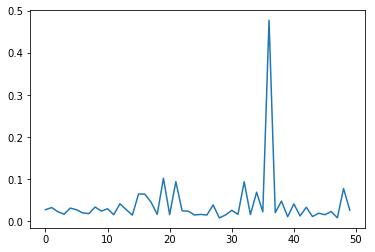

In [40]:
plt.plot(deltas)
plt.show()

In [41]:
def print_values(V, g):
  for i in range(width):
    print("---------------------------")
    for j in range(height):
      v = V.get((i,j), 0)
      if v >= 0:
        print(" %.2f|" % v, end="")
      else:
        print("%.2f|" % v, end="") # -ve sign takes up an extra space
    print("")
# find the optimal state-value function
# V(s) = max[a]{ Q(s,a) }
V = {}
for s in policy.keys():
  V[s] = max_dict(Q[s])[1]

print("final values:")
print_values(V, Grid)

final values:
---------------------------
 9.99| 9.99| 9.92| 9.98| 9.99| 10.00|
---------------------------
 9.99| 9.99| 9.98| 9.98| 10.00| 10.00|
---------------------------
 10.00| 10.00| 9.92| 9.97| 10.00| 10.00|
---------------------------
 9.99| 9.95| 9.96| 9.93| 9.97| 10.00|
---------------------------
 9.99| 9.99| 9.97| 9.96| 10.00| 10.00|
---------------------------
 10.00| 10.00| 9.98| 9.98| 0.00| 9.95|


In [42]:
print("final policy:")
print_policy(policy, Grid)

final policy:
------------------------------------
  L  |  L  |  R  |  R  |  R  |  D  |
------------------------------------
  L  |  L  |  L  |  R  |  R  |  R  |
------------------------------------
  U  |  L  |  L  |  R  |  R  |  U  |
------------------------------------
  U  |  U  |  D  |  D  |  R  |  U  |
------------------------------------
  D  |  D  |  D  |  L  |  R  |  U  |
------------------------------------
  U  |  L  |  D  |  L  |  U  |  U  |
